In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 
from scipy.constants import *
import glob,os


/home/kshitij/.virtualenv/fundamentals/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [1. Radio Science using Interferometric Arrays](#)  
    * Previous: [1.2.3 Radio Regime](1_2_3_Radio_Regime.ipynb)
    * Next: [1.2.5 Bremsstrahlung Radiation](1_2_5_bremsstrahlung_radiation.ipynb)

***

### 1.2.4 Thermal Emission:

There are two main types of emission mechanism seen in astronomy, thermal and non-thermal. As the names suggest, the thermal emission depends on the *temperature* of the black body - non-thermal emission not. In the next few sections, we'll have an overview of the emission mechanisms and some examples of each in radio astronomy.

We'll begin the overview with an example of one of the mechanisms of thermal emission, blackbody emission. 

### 1.2.4.1 Blackbody Emission:

Blackbody emission or thermal emission is an important form of radiation in astronomy. This is in the cases when Thermodynamic Equilibrium exists between radiation and matter - where radiation and matter interact enough to produce the following expression for the specific intensity to be:

\begin{equation}
B_{\nu}(T)=\frac{2h\nu^{3}}{c^{2}} \frac{1}{e^{\frac{h\nu}{kT}}-1},
\end{equation}

this is also known as the Planck Spectrum.

From the equation above, it can be inferred that in a given frequncy interval, the brightness depends only on the *Temperature* of the body. Also, one can see that a body at a higher temperature will produce higher brightness *at all frequencies* - which means that a body at a higher temperature has higher energy output via thermal emission than that of a body at a lower temperature. Yet another consequence is that the frequency at which maximum brightness is produced is directly proportional to the temperature - this is known as Wien's displacement law:

$$\nu_{max} = 58.789  T $$ , where frequency is in GHz and temperature is in Kelvin. <span style="background-color:cyan">AAD:Make a reference to the figure at the end. </span>

At high frequencies where $h\nu >> kT$
 , this will reduce to Wien's approximation :

$$B_{\nu}(T)= \frac{2h\nu^{3}}{c^{2}} e^{\frac{-h\nu}{kT}}$$ 

But in radio astronomy, a more typical situation is when the frequency of the radiation is so low that:  $h\nu << kT$. In such a case, the Planck formula may be reduced to what is called the Rayleigh-Jeans approximation:

$$B_{\nu}(T)= \frac{2\nu^{2}}{c^{2}} kT $$

In [2]:
def B_v(T):
    '''Function to calculate specific intensity/brightness distribution of black
    body radiation at a given temperature. T is in Kelvins and frequency 
    is in Hertz'''
    #Use Wien's displacement law to find the frequency range for given Temperature.
    # nu_max(in GHz) = 58.789*T(in Kelvin)
    nu_max=58.79*T
    freq=np.arange(1,2000,1)
    freq=freq*nu_max/500.0 # <span style="background-color:cyan">AAD:Check the rescaling, explain why 500? </span>
    B = (2*h/c**2.0)*np.exp(-h*freq*10**9/(k*T))*(freq*10**9)**3
    #Change units for plotting to Jansky
    # 1 Jansky = 10^-26 W/m^2 Hz
    B = B*10**26
    return B
        

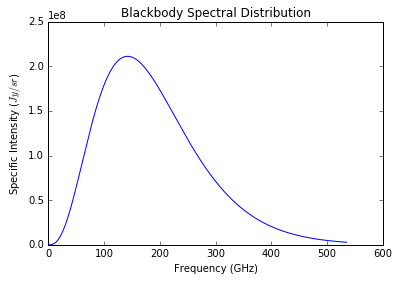

In [3]:
T = 2.275 #In Kelvin
freq = np.arange(1,2000,1)
freq = freq*58.79*T/500.0
B_CMB = B_v(T)
fig,ax = plt.subplots()
ax.plot(freq,B_CMB)
ax.set_xlabel("Frequency (GHz)")
ax.set_ylabel("Specific Intensity ($Jy/sr$)")
ax.set_title("Blackbody Spectral Distribution")

The above distribution is for a temperature of 2.725 K, approximately the same as that of the Cosmic Microwave Background. If 'T' in the above script is changed to $~ 5700$ (K), we would get the plot for the emission from the Sun. 

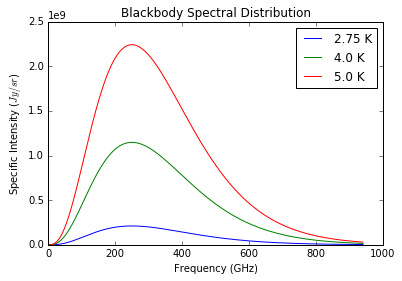

In [4]:
T = 4 #in Kelvin
freq = np.arange(1,2000,1)
freq = freq*58.79*T/500.0
B_2 = B_v(T)
B_3 = B_v(5)
fig,ax = plt.subplots()
ax.plot(freq,B_CMB, label='2.75 K')
ax.plot(freq,B_2, label='4.0 K')
ax.plot(freq,B_3, label='5.0 K')
ax.legend()
ax.set_xlabel("Frequency (GHz)")
ax.set_ylabel("Specific Intensity ($Jy/sr$)")
ax.set_title("Blackbody Spectral Distribution")

As mentioned above, the brightness of the black body radiation depends only on the temperature of the body. This can be used to define a 'brightness temperature' for an object. Simply put, the brightness temperature for an object is given by : $$T_{b} = I_{\nu} \frac{c^{2}}{2k\nu^{2}}$$. It should be noted here that the actual specific intensity of an object is used here, *even when it does not represent black body emission* - the brightness temperature is simply the temperature which the object would have if the specific intensity or brightness was from black body emission. This allows characterization of any object in terms of a single parameter.   

***

Next: [1.2.5 Bremsstrahlung Radiation](1_2_5_bremsstrahlung_radiation.ipynb)
